In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping


# utility libraries
import os
import time
import itertools
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_DenseNet201.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.3
best_batch_size	= 16
best_epochs	= 1


base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = Dropout(best_dropout)(x)

# final softmax probabilistic classification layer
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



Found 6108 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
191/191 [==============================] - 33s 106ms/step - loss: 1.3039 - accuracy: 0.5817 - val_loss: 0.9440 - val_accuracy: 0.7023


# Validation plots

14/14 [==============================] - 4s 96ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.758621,0.550000,0.637681,40.000000
american_house_spider,0.909091,0.750000,0.821918,40.000000
bedbug,0.769231,0.500000,0.606061,40.000000
brown_stink_bug,0.864865,0.800000,0.831169,40.000000
carpenter_ant,0.592593,0.800000,0.680851,40.000000
cellar_spider,0.871795,0.850000,0.860759,40.000000
flea,0.418919,0.775000,0.543860,40.000000
house_centipede,0.941176,0.800000,0.864865,40.000000
silverfish,0.842105,0.800000,0.820513,40.000000
subterranean_termite,0.523810,0.550000,0.536585,40.000000


<Figure size 800x600 with 0 Axes>

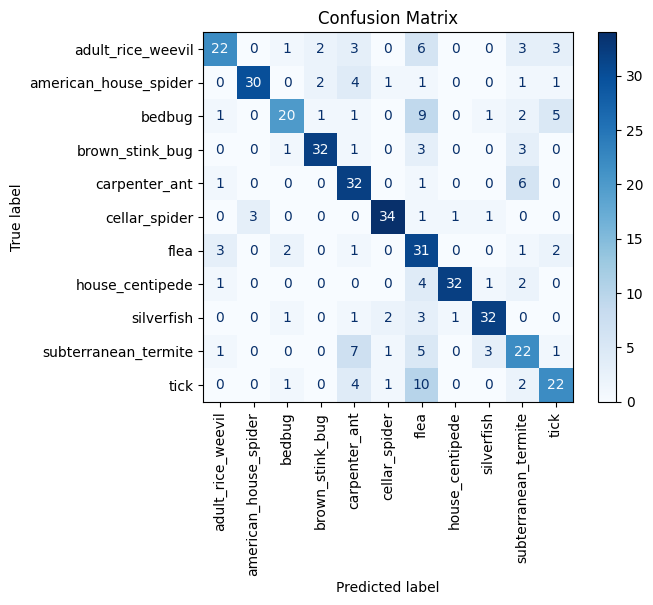

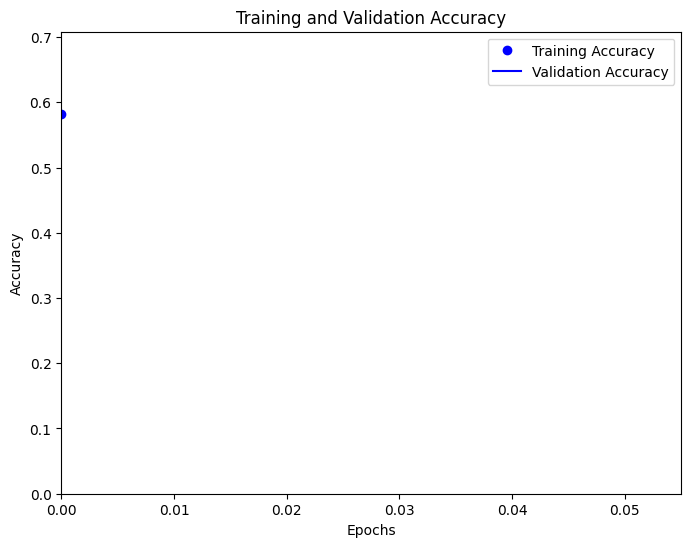

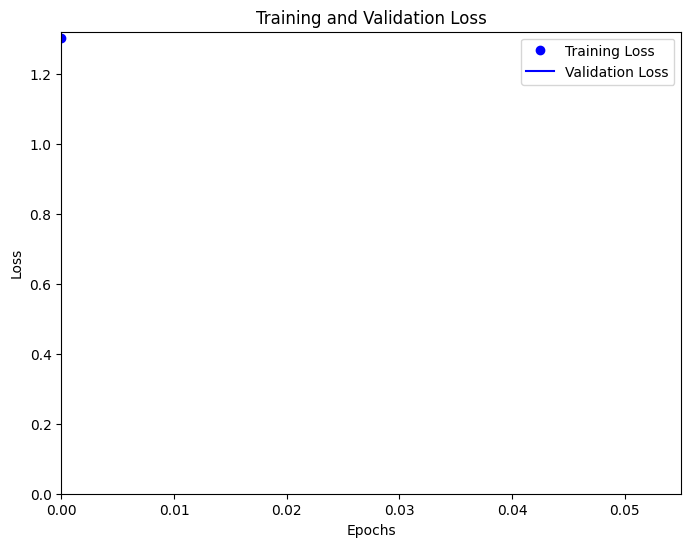

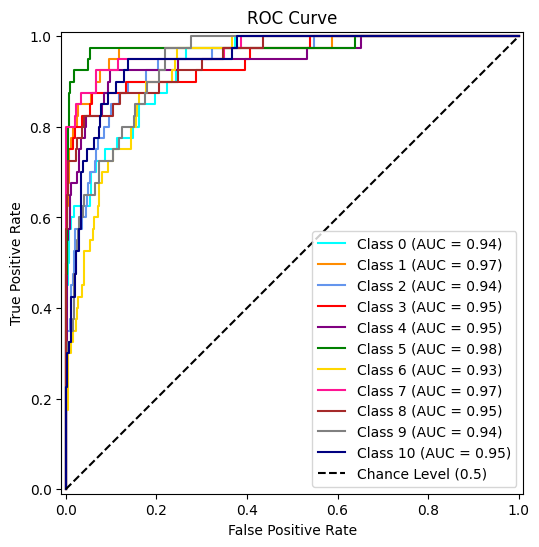

Macro-averaged One-vs-One ROC AUC score: 0.95
Accuracy: 0.702
Precision: 0.74
Recall: 0.702
F1 Score: 0.709


{'accuracy': 0.702,
 'precision': 0.74,
 'recall': 0.702,
 'f1_score': 0.709,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.758621  0.550000  0.637681   40.000000
 american_house_spider   0.909091  0.750000  0.821918   40.000000
 bedbug                  0.769231  0.500000  0.606061   40.000000
 brown_stink_bug         0.864865  0.800000  0.831169   40.000000
 carpenter_ant           0.592593  0.800000  0.680851   40.000000
 cellar_spider           0.871795  0.850000  0.860759   40.000000
 flea                    0.418919  0.775000  0.543860   40.000000
 house_centipede         0.941176  0.800000  0.864865   40.000000
 silverfish              0.842105  0.800000  0.820513   40.000000
 subterranean_termite    0.523810  0.550000  0.536585   40.000000
 tick                    0.647059  0.550000  0.594595   40.000000
 accuracy                0.702273  0.702273  0.702273    0.702273
 macro avg               0.739933  0

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics:'accuracy': 0.702,'precision': 0.74, 'recall': 0.702,'f1_score': 0.709

# Test plots

7/7 [==============================] - 1s 113ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.812500,0.650000,0.722222,20.000000
american_house_spider,0.850000,0.850000,0.850000,20.000000
bedbug,0.750000,0.600000,0.666667,20.000000
brown_stink_bug,0.800000,0.800000,0.800000,20.000000
carpenter_ant,0.625000,0.750000,0.681818,20.000000
cellar_spider,0.739130,0.850000,0.790698,20.000000
flea,0.535714,0.750000,0.625000,20.000000
house_centipede,0.933333,0.700000,0.800000,20.000000
silverfish,0.777778,0.700000,0.736842,20.000000
subterranean_termite,0.500000,0.550000,0.523810,20.000000


<Figure size 800x600 with 0 Axes>

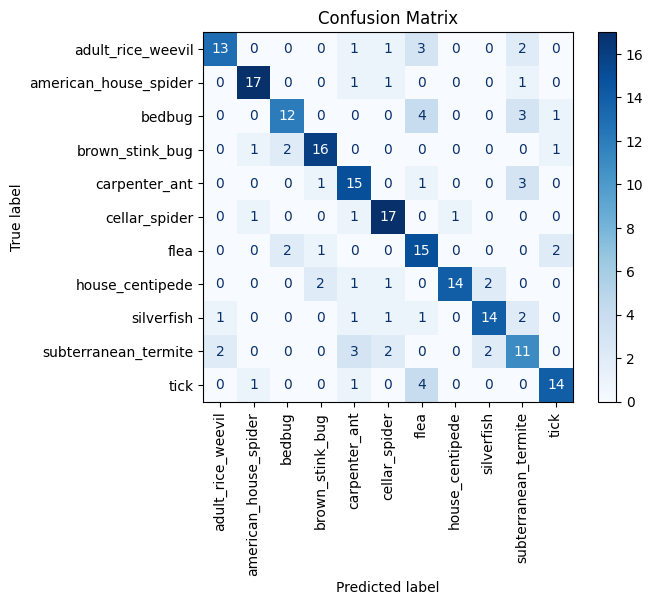

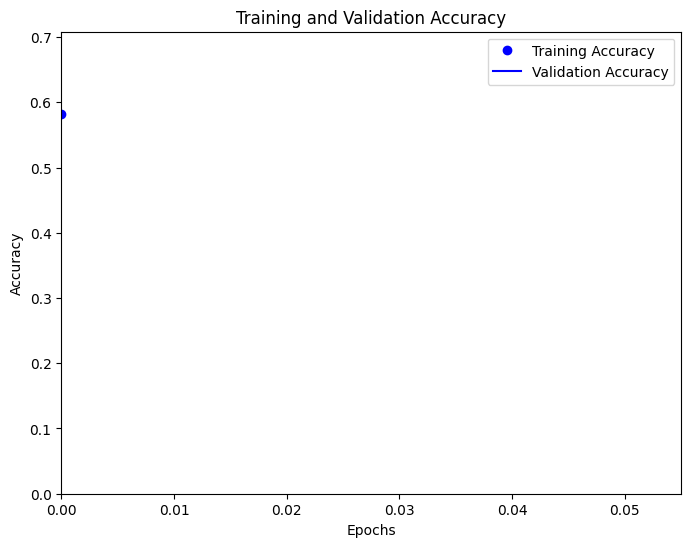

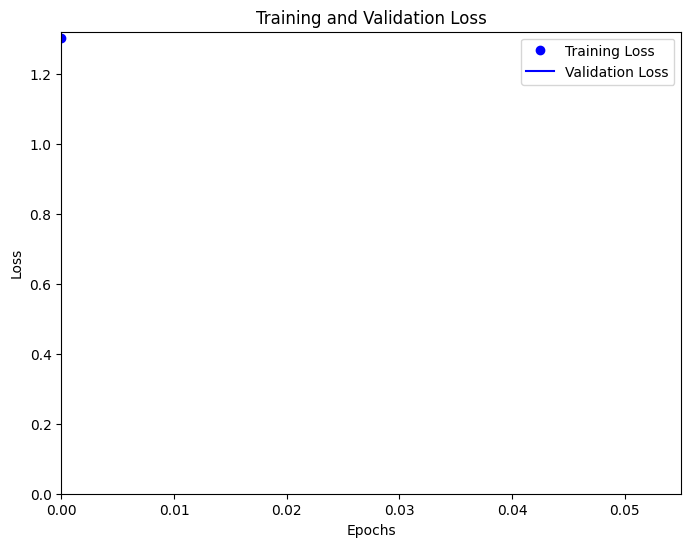

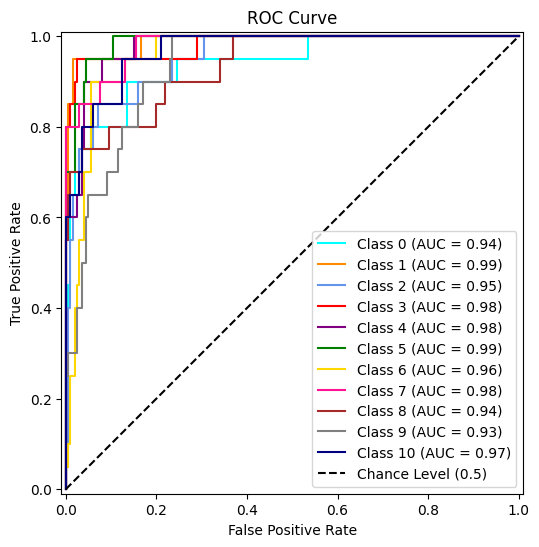

Macro-averaged One-vs-One ROC AUC score: 0.96
Accuracy: 0.718
Precision: 0.736
Recall: 0.718
F1 Score: 0.721


{'accuracy': 0.718,
 'precision': 0.736,
 'recall': 0.718,
 'f1_score': 0.721,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.812500  0.650000  0.722222   20.000000
 american_house_spider   0.850000  0.850000  0.850000   20.000000
 bedbug                  0.750000  0.600000  0.666667   20.000000
 brown_stink_bug         0.800000  0.800000  0.800000   20.000000
 carpenter_ant           0.625000  0.750000  0.681818   20.000000
 cellar_spider           0.739130  0.850000  0.790698   20.000000
 flea                    0.535714  0.750000  0.625000   20.000000
 house_centipede         0.933333  0.700000  0.800000   20.000000
 silverfish              0.777778  0.700000  0.736842   20.000000
 subterranean_termite    0.500000  0.550000  0.523810   20.000000
 tick                    0.777778  0.700000  0.736842   20.000000
 accuracy                0.718182  0.718182  0.718182    0.718182
 macro avg               0.736476  

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.718, 'precision': 0.736,'recall': 0.718, 'f1_score': 0.721